# Clustering
-  Group the data based on similarities 
-  How many group, How grouping is done

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [4]:
#data
mt = data('mtcars')
print(mt.shape, mt.columns,'\n')
#print(mt.dtypes, '\n', mt[['am','mpg','wt','hp','gear']].head())

(32, 11) Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object') 



In [33]:
data1 = mt[['am','mpg','wt','hp','gear']].copy()
data1.head()

,am,mpg,wt,hp,gear
Mazda RX4,1,21.0,2.620,110,4
Mazda RX4 Wag,1,21.0,2.875,110,4
Datsun 710,1,22.8,2.320,93,4
Hornet 4 Drive,0,21.4,3.215,110,3
Hornet Sportabout,0,18.7,3.440,175,3


In [34]:
#group these cars
from sklearn.cluster import KMeans
#!pip install kneed
from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1).round(2)
scaled_data[1:5]

array([[ 1.21,  0.15, -0.36, -0.54,  0.43],
       [ 1.21,  0.46, -0.93, -0.8 ,  0.43],
       [-0.83,  0.22, -0.  , -0.54, -0.95],
       [-0.83, -0.23,  0.23,  0.42, -0.95]])

In [36]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=123)

In [37]:
kmeans.fit(scaled_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=123)

In [38]:
print('Lowest SSE ', kmeans.inertia_)

Lowest SSE  57.90185300751879


In [39]:
print('Final locations of the centroid' )
kmeans.cluster_centers_   #these scaled values of   mt[['am','mpg','wt','hp','gear']]

Final locations of the centroid


array([[ 1.21      ,  1.51      , -1.33      , -1.02      ,  0.82428571],
       [ 1.21      , -0.18833333, -0.26166667,  0.55166667,  1.12      ],
       [-0.83      , -0.49473684,  0.57263158,  0.20052632, -0.65947368]])

In [40]:
print('Groups in which rows belong ', kmeans.labels_[:5])

Groups in which rows belong  [1 1 0 2 2]


In [41]:
kmeans.predict(scaled_data)

array([1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 1])

In [42]:
type(kmeans.predict(scaled_data))

numpy.ndarray

In [44]:
data1['cluster'] = kmeans.predict(scaled_data)
data1.head()

,am,mpg,wt,hp,gear,cluster
Mazda RX4,1,21.0,2.620,110,4,1
Mazda RX4 Wag,1,21.0,2.875,110,4,1
Datsun 710,1,22.8,2.320,93,4,0
Hornet 4 Drive,0,21.4,3.215,110,3,2
Hornet Sportabout,0,18.7,3.440,175,3,2


In [48]:
data1.groupby('cluster').agg({'mpg':[np.mean, np.std], 'hp':[np.std, np.max], 'wt':[np.mean, np.std]})

mpg                   hp             wt          
              mean       std        std amax      mean       std
cluster                                                         
0        29.028571  3.868985  21.416505  113  1.936857  0.303022
1        18.983333  2.845640  95.769341  335  2.964167  0.348546
2        17.147368  3.833966  53.908196  245  3.768895  0.777400

In [52]:
mt[['mpg','wt','hp']].agg(np.std)

mpg     6.026948
wt      0.978457
hp     68.562868
dtype: float64

In [59]:
#how to select number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
#!pip install yellowbrick
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#quick-method

In [66]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

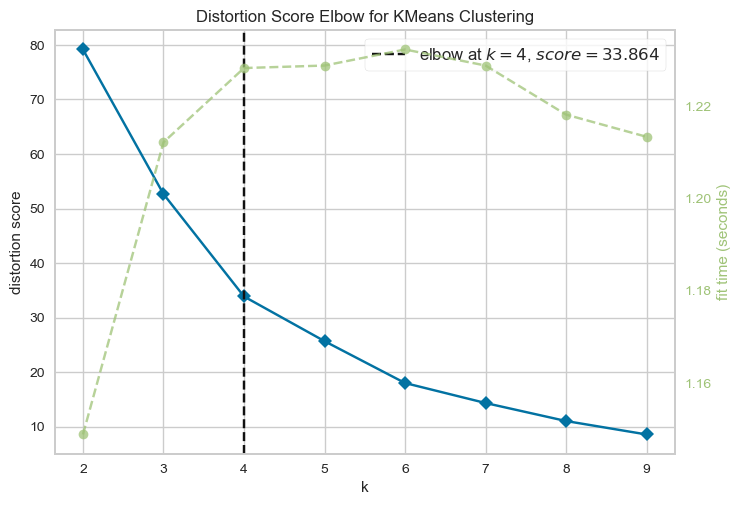

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [67]:
# k is range of number of clusters.
#error due to memory leans 
kelbow_visualizer(KMeans(random_state=4), scaled_data, k=(2,10), n_init=4, P_NUM_THREADS=1)
#https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [68]:
kmeans4 = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=123)

In [70]:
kmeans4.fit(scaled_data)
print('Lowest SSE ', kmeans4.inertia_)
#earlier it was 57

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Lowest SSE  33.864395476190474


In [72]:
#anoterh way
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

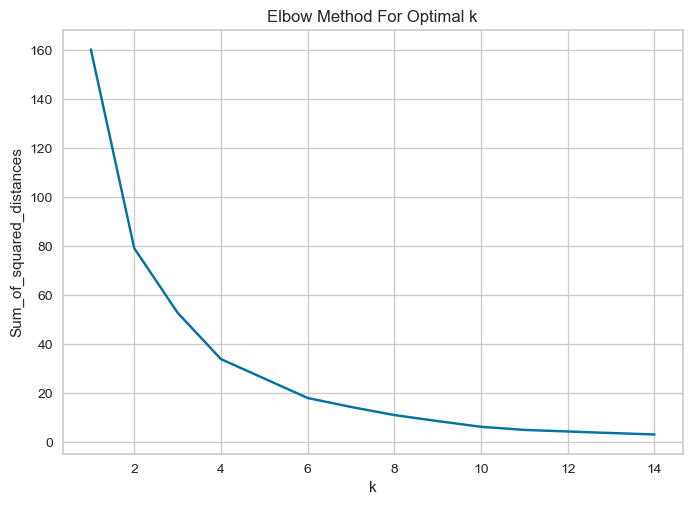

In [73]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show();
#here also it is showing 4 clusters

In [71]:
# Practise
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
    